### General usage

In [1]:
import json
import numpy as np
import os
import cmb_skypatch.plot
import matplotlib.pyplot as plt
import healpy as hp
import component_separation.io as io
import matplotlib.gridspec as gridspec
import component_separation.powspec as pw
import itertools
import platform
from component_separation.cs_util import Config as csu
from component_separation.cs_util import Helperfunctions as hpf
from cmb_skypatch.lib_emp import Lib_emp
from cmb_skypatch.lib import Lib
from matplotlib.patches import Patch
import cmb_skypatch.plot as plot

import cmb_skypatch
with open(os.path.dirname(cmb_skypatch.__file__)+'/config.json', "r") as f:
    cf = json.load(f)

uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"

MSC: reverting to standard healpy


/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  spectrum_trth = pd.read_csv(
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  spectrum_trth = pd.read_csv(
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packa

loaded {'030': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/LFI_SkyMap_030_1024_R4.00_full.fits', '044': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/LFI_SkyMap_044_1024_R4.00_full.fits', '070': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/LFI_SkyMap_070_1024_R4.00_full.fits', '100': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_100_2048_R4.00_full.fits', '143': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_143_2048_R4.00_full.fits', '217': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_217_2048_R4.00_full.fits', '353': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_353_2048_R4.00_full.fits'}


### Load empiric data, one spectrum per detector
you may want to run component_separation to create them

In [2]:
filename = io.make_filenamestring(cf)
print(80*"$")
print("Starting run with the following settings:")
print(cf['pa'])
print("Generated filename(s) for this session: {}".format(filename))
print(80*"$")

emp_C_ltot = io.load_data(io.spec_sc_path_name)
emp_cov_ltot = pw.build_covmatrices(emp_C_ltot, cf['pa']['lmax'], cf['pa']['freqfilter'], cf['pa']['specfilter'])

emp_C_lN = io.load_data(io.noise_sc_path_name)
emp_cov_lN = pw.build_covmatrices(emp_C_lN, cf['pa']['lmax'], cf['pa']['freqfilter'], cf['pa']['specfilter'])

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Starting run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'lens', 'freqdset': 'NPIPE', 'lmax': 3000, 'smoothing_par': [0], 'npatch': [1, 8, 16, 32], 'lmax_mask': 6000, 'smoothing_window': 0, 'max_polynom': 0, 'freqdatsplit': '', 'detector': ['030', '044', '070', '100', '143', '217', '353'], 'freqfilter': ['545', '857'], 'specfilter': ['TT', 'TB', 'TE', 'EB', 'ET', 'BT', 'BE', 'BB'], 'nside': [1024, 2048]}
Generated filename(s) for this session: _C_l_NPIPE_lens_3000_6000_0_0_Full.npy
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_C_l_NPIPE_sim_lens_3000_6000_0_0_Full.npy
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim_diff/SPEC0200_C_l_NPIPE_sim_diff_lens_3000_6000_0_0_Full.npy


### Create a `Lib_emp` object.
The data structure is very similar to the `Lib` object
Currently, `Lib_emp` doesnt support patches or smoothing, thus dictionary must be set
to {'1': { '0': [..] } }.

In [3]:
emp = {'1': { '0': # emp[npatches][smoothing_par]
    Lib_emp(dov_ltot=np.array([emp_cov_ltot["EE"]]), dov_lN=np.array([emp_cov_lN["EE"]]))}}

/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:68: RuntimeWarning: invalid value encountered in true_divide
  self.C_lS = Lib_emp.spectrum_trth[:self.shape[0]].to_numpy()/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:78: RuntimeWarning: invalid value encountered in true_divide
  self.cov_ltot = dov_ltot/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:83: RuntimeWarning: invalid value encountered in true_divide
  self.cov_lN = dov_lN/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:143: RuntimeWarning: divide by zero encountered in true_divide
  ret[row, col] = 1/np.diag(ret)


### Create `Lib` objects. 
One can decide the number of patches and smoothing, for which the spectra are generated. The spectra are 'analytic', i.e.

  * C_lS is taken from planck best fits,
  * C_lN is build by generating npatch patches of the sky, based on equi-noise-level-areas and is then
      deconvolved with the respective beamwindowfunction,
  * C_lF is currently not supported.
By creating the Lib-object, the parameter `cov_ltot_min` is computed, which is the

In [4]:
spdata = dict()
for n in cf['pa']['npatch']:
    if str(n) in spdata.keys():
        pass
    else:
        spdata.update({str(n): dict()})
    for smooth in cf['pa']['smoothing_par']:
        if str(smooth) in spdata[str(n)].keys():
            pass
        else:
            spdata[str(n)].update({str(smooth): 
                Lib(npatch = n, smoothing_par = smooth, C_lF=None, C_lN=None)})

(1,) 5.308346850268287e-09
(1,) 8.121775135576938e-09
(1,) 5.617923875565235e-09
(1,) 5.08471957127459e-09
(1,) 1.5010781601362888e-09
(1,) 3.1460292815688405e-09
(1,) 5.168839576136413e-08


/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib.py:83: RuntimeWarning: invalid value encountered in true_divide
  self.C_lS = Lib.spectrum_trth[:self.shape[0]].to_numpy()/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ret[row, col] = 1/np.diag(ret)


(8,) 5.2891861611715465e-09
(8,) 8.101982946904249e-09
(8,) 5.600826781948789e-09
(8,) 5.058394083587303e-09
(8,) 1.491987318327063e-09
(8,) 3.1297965793436534e-09
(8,) 5.13813966677137e-08
(16,) 5.267722357586065e-09
(16,) 8.07755114677475e-09
(16,) 5.5808179744891845e-09
(16,) 5.030743230281198e-09
(16,) 1.481868278670812e-09
(16,) 3.112686300631609e-09
(16,) 5.1030024537799134e-08
(32,) 5.225197571102257e-09
(32,) 8.029902697126502e-09
(32,) 5.542512017381389e-09
(32,) 4.9745734815014866e-09
(32,) 1.4614810298768829e-09
(32,) 3.0774633271280454e-09
(32,) 5.034269195889279e-08


### Some Plotting to check the results

/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/plot.py:87: RuntimeWarning: invalid value encountered in true_divide
  data_empiric.cov_ltot_min[0,:-1]*hpf.llp1e12(np.arange(0,3000,1))*1e-12/data[npatch]['0'].cov_ltot_min[0,:-1]-1,
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:231: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:232: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:232: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(sy2/n - mean*mean)


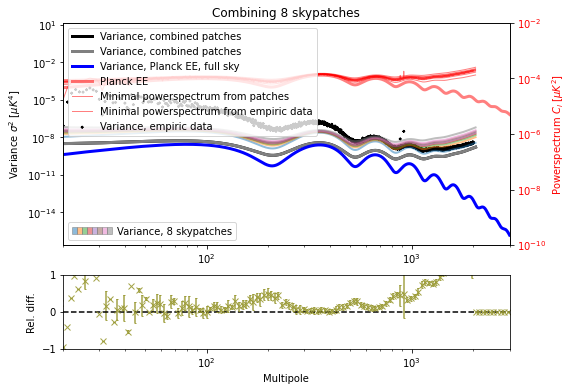

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/sebas/OneDrive/Desktop/Uni/project/cmb_skypatch/vis/analyticpatching-NoiseSignal8patches.jpg'

<Figure size 432x288 with 0 Axes>

In [5]:
plot.spectrum_variance(
    emp['1']['0'],
    spdata,
    rd_ylim=(-0.2,0.7),
    npatch= str(cf['pa']['npatch'][1]),
    smoothing_par = str(cf['pa']['smoothing_par'][0]),
    show = True
)

In [ ]:
plot.compare_variance_min(spdata, show=True)

In [ ]:
plot.compare_improvement(spdata, ["8_20-8_5","8_5-8_0"], show=True)

In [ ]:
plot.compare_errorbars(spdata, ['0'], show=True)